Readme:

For the first part of the project, you will try to determine what affects housing prices using exploratory data analysis, hypothesis tests, and linear regression. The goal of this analysis is to be able to come away with valuable insights regarding home prices. Imagine a real estate agent ccomes to you and asks for information about the housing market in Kings County. What would your analysis tell them that would be helpful to them as they help clients buy and sell houses? 

You will give a short presentation of your insights Wednesday morning. Additionally, you will create a notebook that shows the code to determine your insights. For your presentation, you only need to include graphics and insights that you think are valuable, but for your final notebook, you must innclude the following:

- **Exploratory Data Analysis (EDA):** You must create **at least 4 data visualizations** that help to explain the data. These visualizations should help someone unfamiliar with the data understand the target variable and the features that help explain that target variable.

- **Feature Engineering:** You must create **at least 3 new features** that you think will are related to the price of a house. In the notebook you you need to explain the features you engineer and your thought process behind why you created them.  

- **Statistical Tests:** Your notebook must show **at least 3 statistical tests** that you preformed on your data set. Think of these as being part of your EDA process; for example, if you think houses with a view cost more than those without a view, then perform a two-sample T-test. These willpreliminary evidence that a feature will be important in your model.  

- **Linear Regression Model:** One of the benefits of a linear regression model is that you can **interpret the coefficients** of the model **to derive insights**. For example, which feature has the biggest impact on the price of the house? Was there a feature that you thought would be significant but was not once other features were considered?  Models for inference are typically simpler so they are more straight forward to interpret, so you probably won't include all of your features in this model. 

*Reminder -  **Check Model Assumptions:** While you will have one final model from which you will draw insights, you will probably build multiple models to get there. Your first modeling attempt will probably violated one of the 4 assumptions of a linear regression model, and invesitgating those violations can help you to make a better model. For example, your errors might not be homoscedastic. This could mean that a non-linear transformation of the target variable could improve your model. It is not always possible to perfectly meet those assumptions, so that should not be your goal but, you must make at least one attemmpt to improve your model in order to meet the assumptions.* 

### Step 1: Read in Data

In [502]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
%matplotlib inline

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from pathlib import Path

In [503]:
df= pd.read_csv('kc_house_data_train.csv', index_col= 0)
df.shape
pd.set_option('display.max_columns', 100)

In [504]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


_________

### Step 2: Exploratory Data Analysis
Become familiar with the data. Look to see if there are any extreme values.

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.

In [505]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


In [506]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.015644,-0.001529,0.003833,-0.014251,-0.129837,0.017126,0.000101,0.012594,-0.014272,0.003163,-0.013932,-0.003516,0.013697,-0.019560,-0.008166,-0.001865,0.017388,-0.007494,-0.139605
price,-0.015644,1.000000,0.305106,0.524335,0.703540,0.086803,0.256985,0.275779,0.395485,0.036099,0.666215,0.607760,0.323312,0.056450,0.117770,-0.048958,0.302394,0.019327,0.585567,0.081423
bedrooms,-0.001529,0.305106,1.000000,0.507867,0.570428,0.029375,0.172975,-0.008581,0.079741,0.025266,0.354679,0.472492,0.300085,0.153769,0.013679,-0.147515,-0.002170,0.124279,0.387589,0.026665
bathrooms,0.003833,0.524335,0.507867,1.000000,0.755270,0.085470,0.497967,0.065848,0.188817,-0.122976,0.664191,0.686853,0.282700,0.507761,0.048140,-0.201527,0.023074,0.221308,0.568080,0.086499
sqft_living,-0.014251,0.703540,0.570428,0.755270,1.000000,0.166810,0.357169,0.109738,0.283336,-0.061530,0.762929,0.876696,0.435529,0.319397,0.051448,-0.195893,0.052646,0.234453,0.755066,0.179570
sqft_lot,-0.129837,0.086803,0.029375,0.085470,0.166810,1.000000,-0.002205,0.015356,0.073058,-0.013715,0.110320,0.180755,0.008065,0.054228,0.004520,-0.126590,-0.082029,0.226190,0.136959,0.701875
floors,0.017126,0.256985,0.172975,0.497967,0.357169,-0.002205,1.000000,0.025132,0.025883,-0.259230,0.458984,0.528509,-0.247481,0.483657,0.005985,-0.060560,0.048227,0.128795,0.283933,-0.008170
waterfront,0.000101,0.275779,-0.008581,0.065848,0.109738,0.015356,0.025132,1.000000,0.407565,0.009608,0.092234,0.077162,0.083433,-0.021981,0.094268,0.034282,-0.013331,-0.042728,0.091090,0.026895
view,0.012594,0.395485,0.079741,0.188817,0.283336,0.073058,0.025883,0.407565,1.000000,0.045060,0.249554,0.164747,0.279939,-0.049593,0.091291,0.089475,0.003820,-0.077572,0.279999,0.073185
condition,-0.014272,0.036099,0.025266,-0.122976,-0.061530,-0.013715,-0.259230,0.009608,0.045060,1.000000,-0.142066,-0.157466,0.166923,-0.358921,-0.060969,0.007068,-0.009927,-0.109200,-0.094307,-0.007125


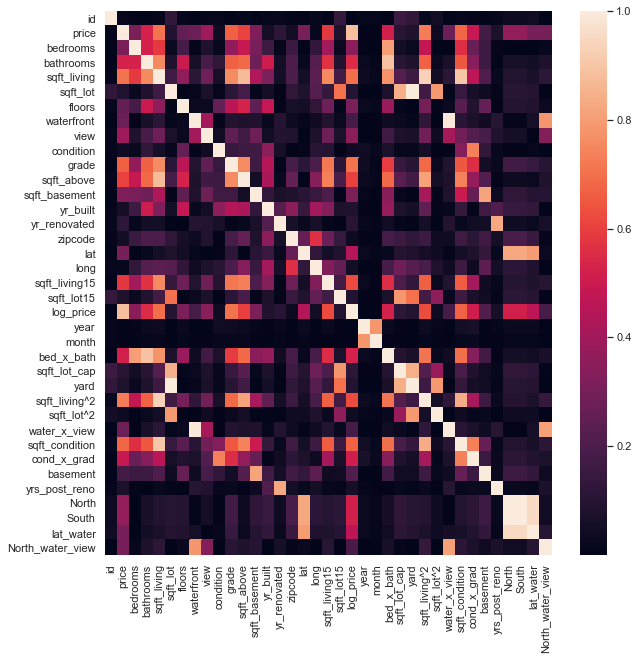

In [648]:
# Applying the .heatmap method to depict the relationships visually
sns.set(rc={'figure.figsize':(10, 10)})

sns.heatmap(df.corr().abs())
sns.color_palette("crest")
plt.savefig('heatmap');

In [508]:
#creating list of correlation features 
housing_corr = df.corr()['price'].map(abs).sort_values(ascending=False)
housing_corr

price            1.000000
sqft_living      0.703540
grade            0.666215
sqft_above       0.607760
sqft_living15    0.585567
bathrooms        0.524335
view             0.395485
sqft_basement    0.323312
bedrooms         0.305106
lat              0.302394
waterfront       0.275779
floors           0.256985
yr_renovated     0.117770
sqft_lot         0.086803
sqft_lot15       0.081423
yr_built         0.056450
zipcode          0.048958
condition        0.036099
long             0.019327
id               0.015644
Name: price, dtype: float64

In [509]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

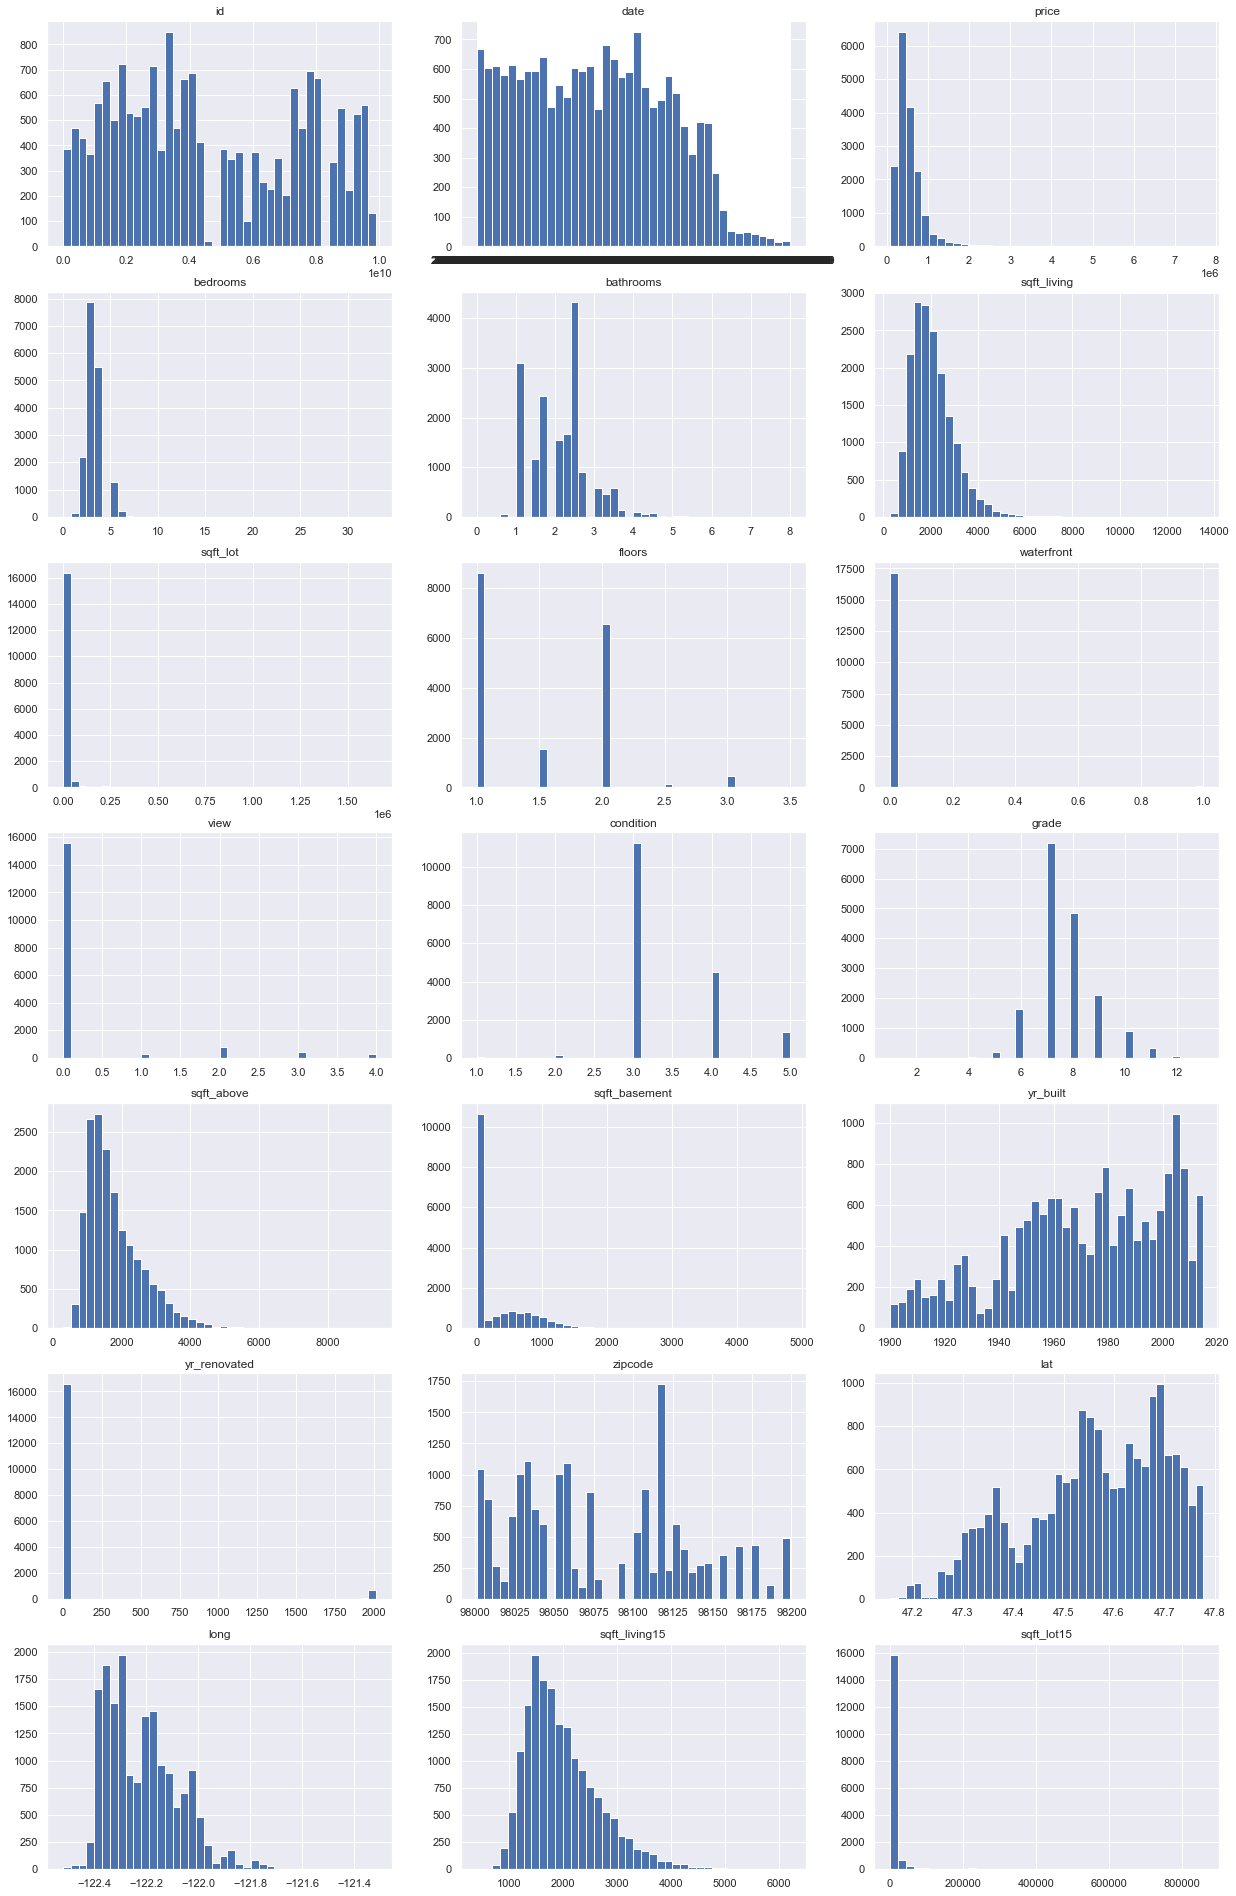

In [510]:
fig, axs = plt.subplots(7,3, figsize=(21,34))

for index, ax in enumerate(axs.flatten()):
    if index < 21:
        column = df.columns[index]
        ax.hist(df[column], bins=40)
        ax.set_title(column)
plt.show()

______

PRICE

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

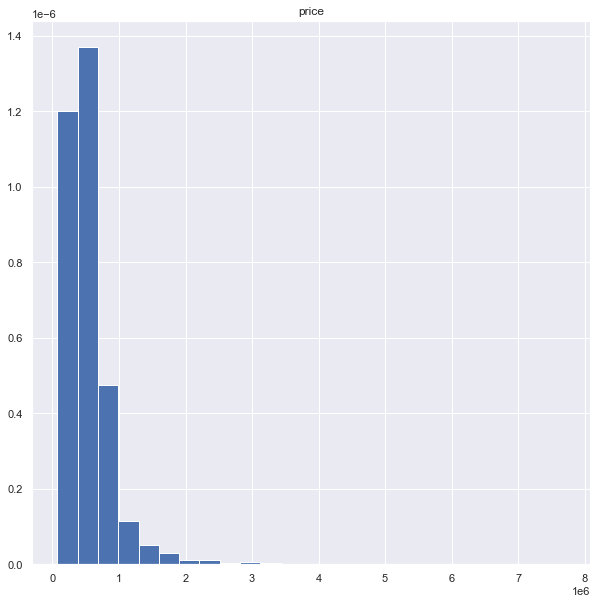

In [511]:
#Looking a price itself
df.hist(column=['price'], bins=25, density =True)
#its not exactly linear

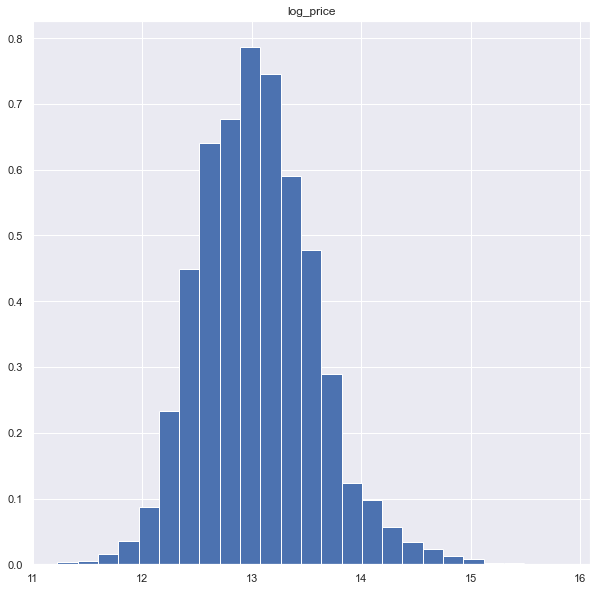

In [512]:
#Create new column for the log of price, we can use this for our train test split
df['log_price'] = np.log(df['price'])
df.hist(column= ['log_price'], bins= 25, density=True);

DATE

In [513]:
#changing 'date' column to datetime 
df['date']= pd.to_datetime(df['date'])
df['year']= pd.DatetimeIndex(df['date']).year
df['month']= pd.DatetimeIndex(df['date']).month

BEDROOMS

In [514]:
#finding bedrooms outliers
df.bedrooms.values.max()
df[df['bedrooms']==33]
df['bedrooms'] = df['bedrooms'].replace([33], 3)

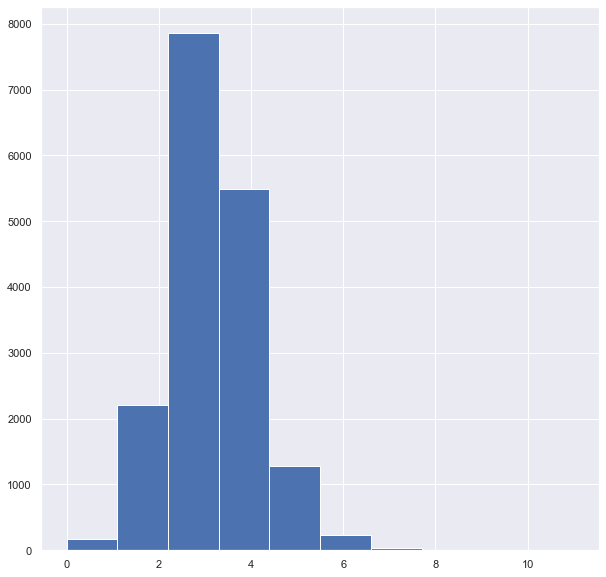

In [515]:
# Looking to see if bedrooms are normally distributed 
df['bedrooms'].hist(bins=10);

In [516]:
# #def conditions(x):
#     if df[(df['bedrooms']==0) & (df['sqft_living']<902)]:
#         return 0
#     elif df[(df['bedrooms']==0) & (df['sqft_living'].isin(range(902,1246)))]:
#         return 1
#     elif df[(df['bedrooms']==0) & (df['sqft_living'].isin(range(1246,1805)))]:
#         return 2
#     elif df[(df['bedrooms']==0) & (df['sqft_living'].isin(range(1805,2557)))]:
#         return 3
#     elif df[(df['bedrooms']==0) & (df['sqft_living'].isin(range(2557,3039)))]:
#         return 4
#     elif df[(df['bedrooms']==0) & (df['sqft_living'].isin(range(3039,3257)))]:
#         return 5
#     elif df[(df['bedrooms']==0) & (df['sqft_living'].isin(range(3257,4061)))]:
#         return 6
#     else: 
#         return 99


# func = np.vectorize(conditions)
# energy_class = func(df['bedrooms'])

In [517]:
# #imputing the 0 bedroom counts with mean of bedrooms based on sqft_living
# conditions=[
#     df['sqft_living']<902,
#     df['sqft_living'].isin(range(902,1246)),
#     df['sqft_living'].isin(range(1246,1805)),
#     df['sqft_living'].isin(range(1805,2557)),
#     df['sqft_living'].isin(range(2557,3039)),
#     df['sqft_living'].isin(range(3039,3257)),
#     df['sqft_living'].isin(range(3257,4061)),
#     df['sqft_living']>=4061
# ]

# choices=[
#     0,
#     1,
#     2,
#     3,
#     4,
#     5,
#     6,
#     7    
# ]

# df['bedrooms_2']= np.where((df['bedrooms']==0 & conditions), choices, df['bedrooms'])

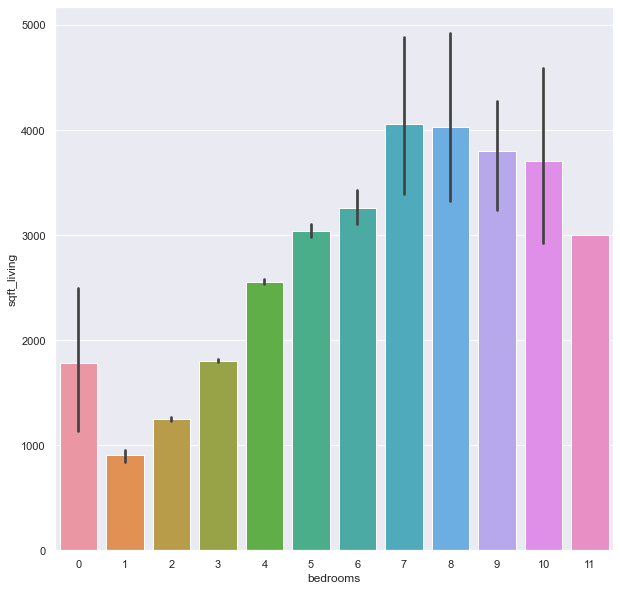

In [518]:
sns.set_style('darkgrid')
x = df['bedrooms']
y = df['sqft_living']
fig, ax = plt.subplots()
ax = sns.barplot(x=x,y=y, data=df)
ax.ticklabel_format(style='plain', axis='y')
plt.show()

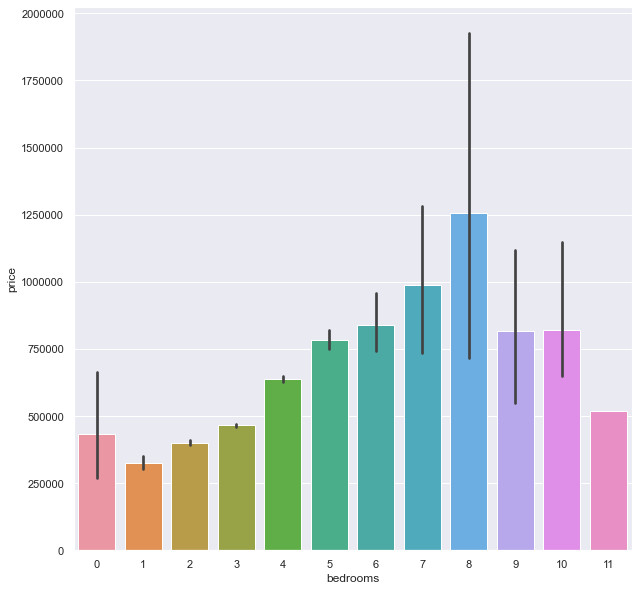

In [649]:
sns.set_style('darkgrid')
x = df['bedrooms']
y = df['price']
fig, ax = plt.subplots()
ax = sns.barplot(x=x,y=y, data=df)
ax.ticklabel_format(style='plain', axis='y')
plt.savefig('bed_price')
plt.show()

BATHROOMS

/Users/leratsayukova/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

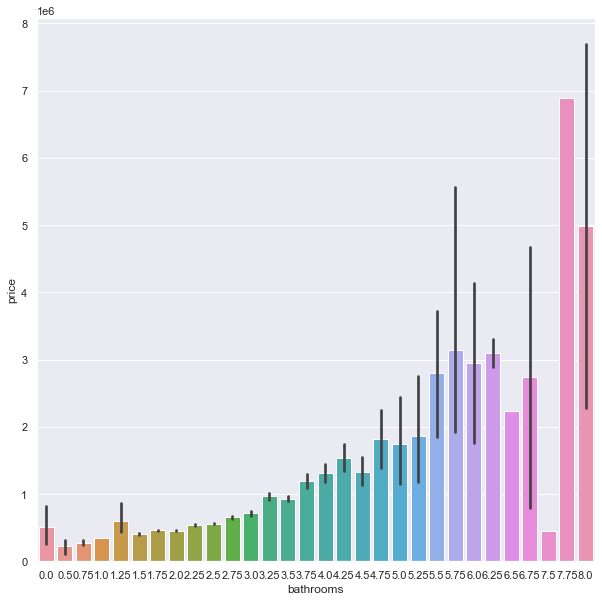

In [520]:

sns.set_style('darkgrid')
x= df['bathrooms']
y= df['price']
sns.barplot(x,y)
plt.show

In [521]:
#**Running a Linear Regression model with Bathrooms as the residual and 
#Price as the Target:
sm.formula.ols(formula = 'price ~ C(bathrooms)', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     336.2
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        14:33:46   Log-Likelihood:            -2.4250e+05
No. Observations:               17290   AIC:                         4.851e+05
Df Residuals:                   17260   BIC:                         4.853e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             5.077e+05   1.06e+05      4.808      0.000    3.01e+05    7.15e+05
C(bathrooms)[T.0.5]  -2.822e+05   2.02e+05     -1.396      0.163   -6.79e+05    1.14e+05
C(bathrooms)[T.0.75] -2.311e+05   1.13e+05     -2.037      0.042   -4.53e+05   -8719.182
C(bathrooms)[T.1.0]  -1.614e+05   1.06e+05     -1.526      0.127   -3.69e+05    4.59e+04
C(bathrooms)[T.1.25]  9.329e+04   1.61e+05      0.578      0.563   -2.23e+05    4.09e+05
C(bathrooms)[T.1.5]  -1.003e+05   1.06e+05     -0.947      0.344   -3.08e+05    1.07e+05
C(bathrooms)[T.1.75] -4.943e+04   1.06e+05     -0.467      0.640   -2.57e+05    1.58e+05
C(bathrooms)[T.2.0]  -5.196e+04   1.06e+05     -0.491      0.624   -2.59e+05    1.56e+05
C(bathrooms)[T.2.25]  2.957e+04   1.06e+05      0.279      0.780   -1.78e+05    2.37e+05
C(bathrooms)[T.2.5]   4.893e+04   1.06e+05      0.463      0.643   -1.58e+05    2.56e+05
C(bathrooms)[T.2.75]  1.468e+05   1.06e+05      1.384      0.166   -6.11e+04    3.55e+05
C(bathrooms)[T.3.0]   2.072e+05   1.06e+05      1.949      0.051   -1179.935    4.16e+05
C(bathrooms)[T.3.25]   4.58e+05   1.07e+05      4.299      0.000    2.49e+05    6.67e+05
C(bathrooms)[T.3.5]   4.213e+05   1.06e+05      3.963      0.000    2.13e+05     6.3e+05
C(bathrooms)[T.3.75]  6.906e+05   1.09e+05      6.354      0.000    4.78e+05    9.04e+05
C(bathrooms)[T.4.0]   8.021e+05   1.09e+05      7.327      0.000    5.88e+05    1.02e+06
C(bathrooms)[T.4.25]  1.024e+06   1.12e+05      9.146      0.000    8.05e+05    1.24e+06
C(bathrooms)[T.4.5]   8.209e+05   1.11e+05      7.394      0.000    6.03e+05    1.04e+06
C(bathrooms)[T.4.75]   1.31e+06   1.29e+05     10.130      0.000    1.06e+06    1.56e+06
C(bathrooms)[T.5.0]   1.242e+06   1.28e+05      9.697      0.000    9.91e+05    1.49e+06
C(bathrooms)[T.5.25]  1.358e+06   1.39e+05      9.788      0.000    1.09e+06    1.63e+06
C(bathrooms)[T.5.5]   2.296e+06   1.55e+05     14.850      0.000    1.99e+06     2.6e+06
C(bathrooms)[T.5.75]  2.636e+06   2.02e+05     13.034      0.000    2.24e+06    3.03e+06
C(bathrooms)[T.6.0]   2.439e+06   1.61e+05     15.121      0.000    2.12e+06    2.76e+06
C(bathrooms)[T.6.25]  2.586e+06   2.36e+05     10.953      0.000    2.12e+06    3.05e+06
C(bathrooms)[T.6.5]   1.731e+06   3.17e+05      5.465      0.000    1.11e+06    2.35e+06
C(bathrooms)[T.6.75]  2.226e+06   2.36e+05      9.428      0.000    1.76e+06    2.69e+06
C(bathrooms)[T.7.5]  -5.771e+04   3.17e+05     -0.182      0.855   -6.79e+05    5.63e+05
C(bathrooms)[T.7.75]  6.377e+06   3.17e+05     20.131      0.000    5.76e+06       7e+06
C(bathrooms)[T.8.0]   4.482e+06   2.36e+05     18.983      0.000    4.02e+06    4.95e+06
==============================================================================
Omnibus:                    11616.557   Durbin-Watson:             

In [522]:
df['bathrooms_r']= df['bathrooms'] *100
df['bathrooms_r'] = df['bathrooms_r'].astype(int)

In [523]:
conditions= [
     df['bathrooms_r'].isin(range(0,300)),
     df['bathrooms_r'].isin(range(300,500)),
     df['bathrooms_r'].isin(range(500,760)),
     df['bathrooms_r'].isin(range(760,900))
     ]
    

choices= [
    '0-2',
    '3-4',
    '5-6',
    '7-8'
]

df['bathrooms_r']= np.select(conditions, choices, default= 9)

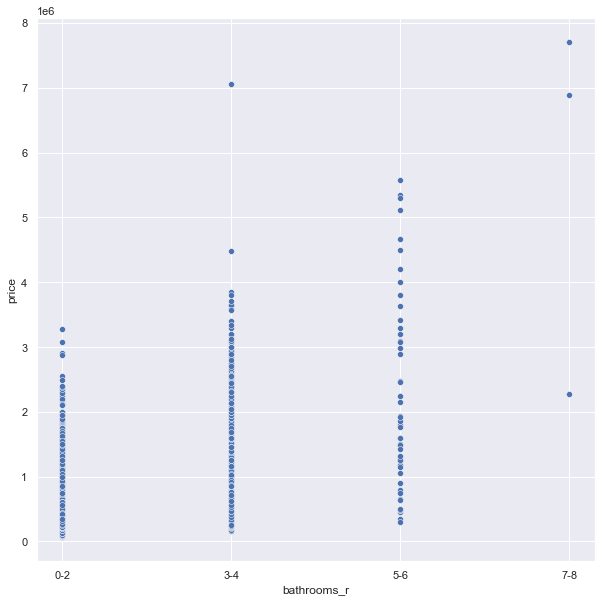

In [524]:
sns.scatterplot(data= df, x='bathrooms_r', y='price' )
plt.show()


In [525]:
df['bathrooms_r'].value_counts()

0-2    15201
3-4     2036
5-6       50
7-8        3
Name: bathrooms_r, dtype: int64

In [526]:
ols(formula= 'price~C(bathrooms_r)', data= df).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     2018.
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        14:33:46   Log-Likelihood:            -2.4377e+05
No. Observations:               17290   AIC:                         4.876e+05
Df Residuals:                   17286   BIC:                         4.876e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              4.789e+05   2606.062    183.757      0.000    4.74e+05    4.84e+05
C(bathrooms_r)[T.3-4]  4.748e+05   7582.749     62.614      0.000     4.6e+05     4.9e+05
C(bathrooms_r)[T.5-6]  1.748e+06   4.55e+04     38.407      0.000    1.66e+06    1.84e+06
C(bathrooms_r)[T.7-8]  5.143e+06   1.86e+05     27.720      0.000    4.78e+06    5.51e+06
==============================================================================
Omnibus:                    11426.553   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           363629.429
Skew:                           2.714   Prob(JB):                         0.00
Kurtosis:                      24.801   Cond. No.                         76.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [527]:
#average number of bathrooms per number of bedrooms
df.groupby('bedrooms')['bathrooms'].mean()

bedrooms
0     0.895833
1     1.079687
2     1.402790
3     1.966751
4     2.432671
5     2.763055
6     3.044760
7     3.533333
8     3.775000
9     4.400000
10    3.416667
11    3.000000
Name: bathrooms, dtype: float64

In [528]:
df.groupby('bedrooms')['sqft_living'].mean()

bedrooms
0     1779.833333
1      902.312500
2     1246.456443
3     1805.161729
4     2557.756013
5     3039.706937
6     3257.026201
7     4061.000000
8     4029.000000
9     3800.000000
10    3706.666667
11    3000.000000
Name: sqft_living, dtype: float64

In [529]:
df['bed_x_bath']= df['bathrooms']*df['bedrooms']

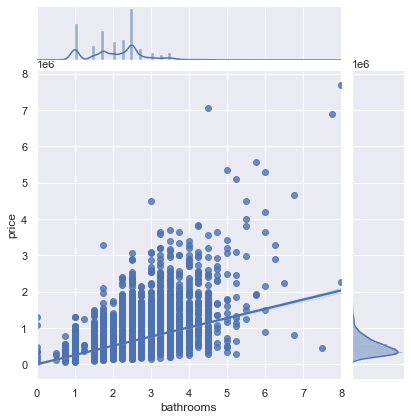

In [650]:
sns.jointplot(x="bathrooms", y="price", data=df, kind="reg")
plt.savefig('bathrooms');


In [531]:
df.corr()['price']['bed_x_bath']

0.5187762948306942

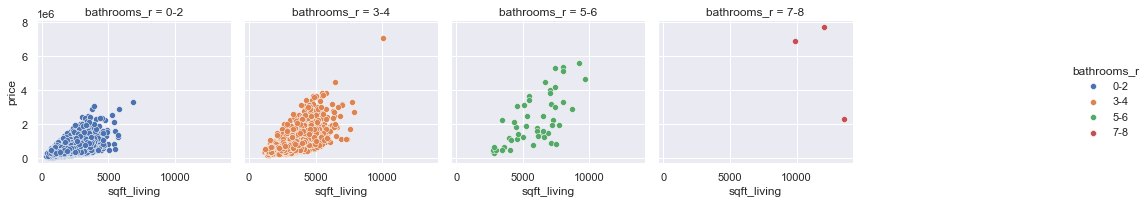

In [532]:
 grid = sns.FacetGrid(df, col = 'bathrooms_r', hue = 'bathrooms_r', col_wrap=5)
grid.map(sns.scatterplot, "sqft_living", "price")

grid.add_legend()

plt.show()

SQFT_LIVING/ SQFT_ LOT/ FLOORS

In [533]:
sqft_outliers_mil= df[(df['sqft_lot']>150000) & (df['price']>1000000)]
len(sqft_outliers_mil)

29

In [534]:
len(df[df['sqft_lot']>150000])

271

In [535]:
#capping sqft_lot at 200,000 - a bit more than 3 standard deviations away from the mean 

df['sqft_lot_cap']= np.clip(df['sqft_lot'], a_max=200000, a_min=None)

In [536]:
#Engineering a new feature to estimate size of outdoor space-- yard
df['yard']= abs(df['sqft_lot'] - (df['sqft_living']/df['floors']))

In [537]:
sorted(df['yard'].value_counts().index.tolist())

[3.0,
 21.66666666666663,
 30.0,
 47.0,
 60.0,
 65.0,
 85.0,
 100.0,
 104.0,
 108.0,
 114.0,
 120.0,
 123.0,
 125.0,
 129.0,
 130.0,
 134.0,
 136.0,
 151.0,
 166.0,
 181.0,
 188.0,
 190.0,
 190.66666666666663,
 195.0,
 198.0,
 199.0,
 200.0,
 201.0,
 211.0,
 216.33333333333331,
 220.0,
 226.0,
 228.0,
 229.0,
 230.0,
 231.0,
 238.0,
 240.0,
 243.0,
 253.0,
 254.0,
 260.0,
 265.0,
 266.0,
 269.0,
 271.3333333333333,
 280.0,
 281.6666666666667,
 282.0,
 284.0,
 285.0,
 290.0,
 291.0,
 297.6666666666667,
 300.0,
 302.0,
 305.0,
 305.5,
 307.0,
 308.0,
 310.0,
 312.0,
 314.0,
 315.0,
 317.0,
 320.0,
 329.0,
 335.0,
 337.0,
 338.0,
 342.0,
 345.0,
 347.6666666666667,
 348.0,
 349.0,
 350.0,
 351.0,
 355.0,
 356.0,
 360.0,
 360.3333333333333,
 361.0,
 362.6666666666667,
 363.0,
 364.0,
 364.5,
 366.0,
 370.5,
 372.0,
 372.6666666666667,
 374.0,
 377.0,
 378.0,
 381.0,
 383.0,
 385.0,
 391.0,
 393.33333333333337,
 394.3333333333333,
 395.0,
 396.0,
 400.0,
 402.0,
 404.3333333333333,
 405.0,


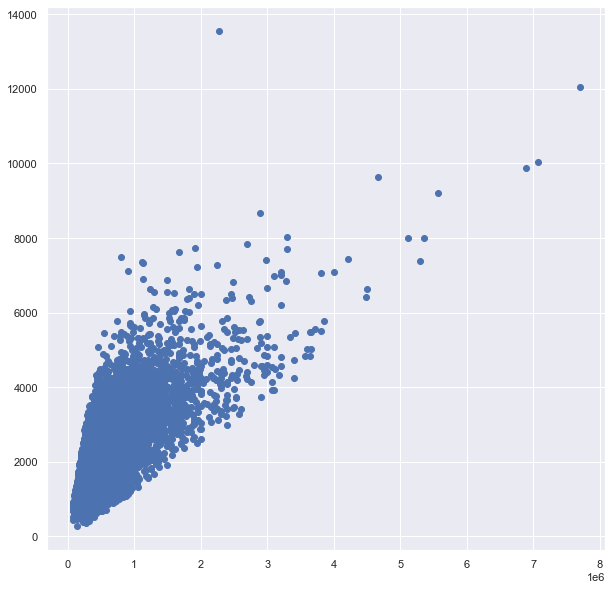

In [538]:
plt.scatter(df['price'], df['sqft_living'])

array([[<AxesSubplot:title={'center':'sqft_living'}>]], dtype=object)

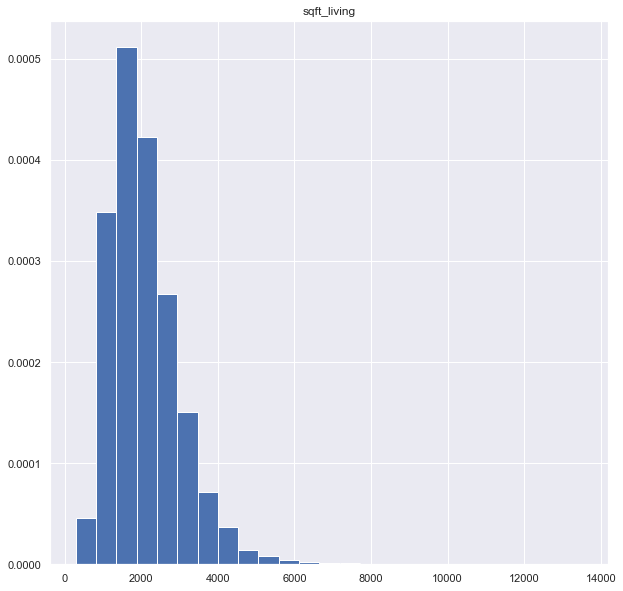

In [539]:
df.hist(column=['sqft_living'], bins=25, density =True)

In [540]:
#Running a linear regression model for price based on sqft_living
sm.formula.ols(formula = 'price ~ sqft_living', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 1.694e+04
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        14:33:50   Log-Likelihood:            -2.4046e+05
No. Observations:               17290   AIC:                         4.809e+05
Df Residuals:                   17288   BIC:                         4.809e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.347e+04   4991.006    -10.714      0.000   -6.33e+04   -4.37e+04
sqft_living   285.4779      2.193    130.167      0.000     281.179     289.777
==============================================================================
Omnibus:                    12367.474   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           507839.480
Skew:                           2.968   Prob(JB):                         0.00
Kurtosis:                      28.878   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [541]:
#Engineering a new feature to square sqft_living and sqft_lot
df['sqft_living^2'] = df['sqft_living']**2
df['sqft_lot^2'] = df['sqft_lot']**2

______

WATERFRONT/ VIEW

In [542]:
#creating a new column by multiplying waterfront and view
df['water_x_view']= df['waterfront'] *df['view']

print(df.corr()['waterfront']['price'])
print(df.corr()['water_x_view']['price'])


0.2757786708046838
0.2758623993490541


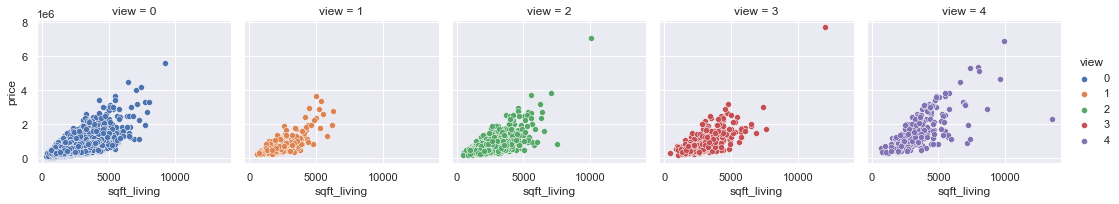

<Figure size 720x720 with 0 Axes>

In [651]:
grid = sns.FacetGrid(df, col = 'view', hue = 'view', col_wrap=5)
grid.map(sns.scatterplot, "sqft_living", "price")

grid.add_legend()

plt.show()
plt.savefig('view_price');

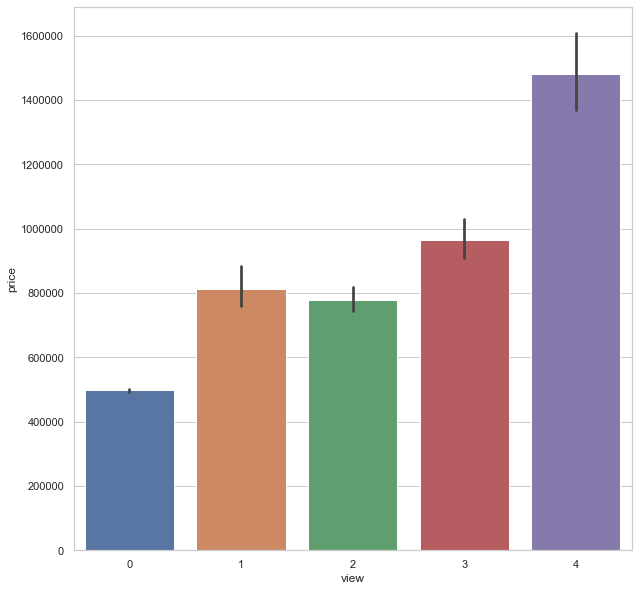

In [544]:
sns.set_style('whitegrid')
x = df['view']
y = df['price']
fig, ax = plt.subplots()
ax = sns.barplot(x=x,y=y, data=df)
ax.ticklabel_format(style='plain', axis='y')
plt.show()

In [545]:
#There seems to be a difference in price based on the view. 
#Lets investigate further and run an ANOVA Test:

alpha= 0.1
results2= stats.f_oneway(df['view'], df['price'])
statistic, p_value= results2
print(p_value <alpha)
results2

True


F_onewayResult(statistic=36275.27724217961, pvalue=0.0)

CONDITION/GRADE

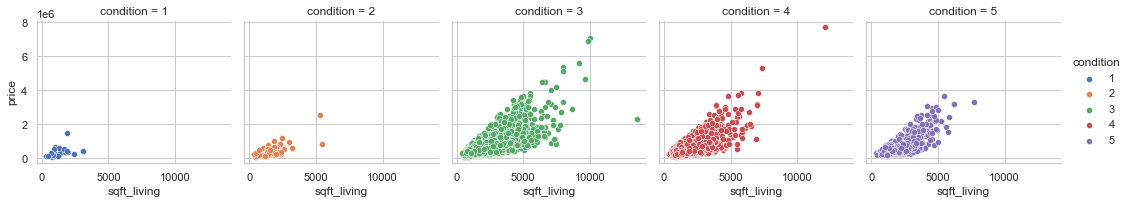

In [546]:
grid = sns.FacetGrid(df, col = "condition", hue = "condition", col_wrap=5)
grid.map(sns.scatterplot, "sqft_living", "price")

grid.add_legend()

plt.show()

In [547]:
df['sqft_condition']= df['sqft_living']*df['condition']


In [548]:
df.groupby('condition')['price'].median()

conditions= [
    (df['condition']==1),
    (df['condition']==2),
    (df['condition']==3),
    (df['condition']==4),
    (df['condition']==5)
]

choices= [
    'Poor',
    'Poor',
    'Average',
    'Average',
    'High']

df['conditions_2']= np.select(conditions, choices, default= df['condition'])

In [549]:
df['grade'].value_counts()

7     7183
8     4848
9     2099
6     1648
10     893
11     319
5      192
12      72
4       22
13      11
3        2
1        1
Name: grade, dtype: int64

In [550]:
conditions= [
    df['grade'].isin(range(1,7)),
    df['grade'].isin(range(7,8)),
    df['grade'].isin(range(8,9)),
    df['grade'].isin(range(9,14))
]

choices= [
    'Poor',
    'Average',
    'Good',
    'High']

df['grade_cat']= np.select(conditions, choices)

In [551]:
#creating a new column by multiplying grade and condition
df['cond_x_grad']= df['condition']*df['grade']

In [552]:
df.corr()['price']['cond_x_grad']

0.48899639326047734

SQFT BASEMENT

In [553]:

#Created a new column of whether or not there is a basement
df['basement']= np.where(df['sqft_basement'].values > 0, 1, 0)

In [554]:
df['basement'].value_counts(normalize=True)

0    0.606362
1    0.393638
Name: basement, dtype: float64

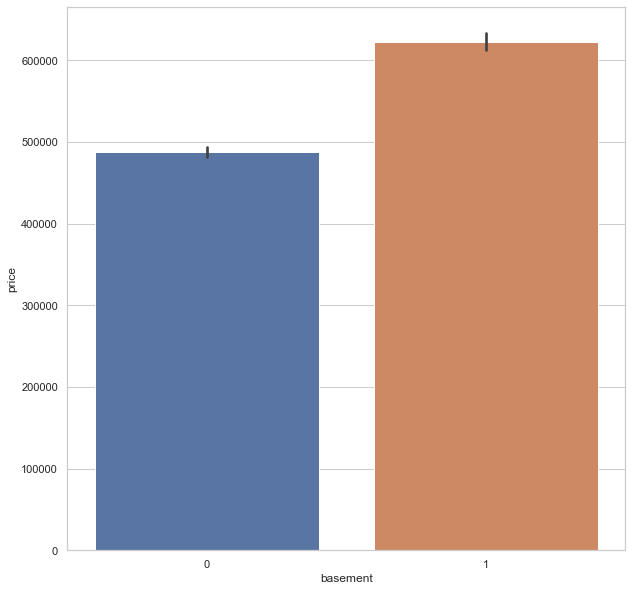

In [555]:
sns.barplot(x='basement', y='price', data=df)
ax.set_title('Do basements impact housing prices?');

#### Lets see if having a basement has any effect on price:

#### Running a T-Test of Independence
Null: The average price of a home with a basement is the same as the average price of a home without a basement.

Alternative: The average price of a home with a basement is not the same price as a home without a basement.


In [556]:
alpha= 0.05

basement=df[df['basement']== 1] 
no_basement=df[df['basement']==0]
basement_price= basement['price']
no_basement_price= no_basement['price']

results= stats.ttest_ind(basement_price, no_basement_price, nan_policy='omit')
statistic, p_value= results
results
p_value<alpha

True

After running a T-test of independence we can, we see that since our p_value is smaller than our alpha, we can reject the null hypothesis and conclude that **the average price of a home without a basement is different than the average price of a home WITH a basement.**

YEAR BUILT/ YEAR RENOVATED

In [557]:
#How many houses were renovated?
sum(df['yr_renovated']>0)
df['yr_renovated'].value_counts(normalize=True)

conditions= [
    (df['yr_renovated']!=0), 
    (df['yr_renovated']==0),
]
choices= [
    (2020- df['yr_renovated']),
    0   
]

df['yrs_post_reno']= np.select(conditions, choices, 99)

In [558]:
print(df.corr()['yr_renovated']['price'])
print(df.corr()['yrs_post_reno']['price'])

0.11776994288662286
0.07269680140828161


ZIPCODE/ LAT/ LONG

In [559]:
#Seems as though there is a high correlation between price and latitude 
df.corr()['price']['lat']

0.3023937737041474

**Lets look at the Latitude of Homes in the dataset, perhaps splitting them up if appropriate:**

In [560]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

/Users/leratsayukova/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


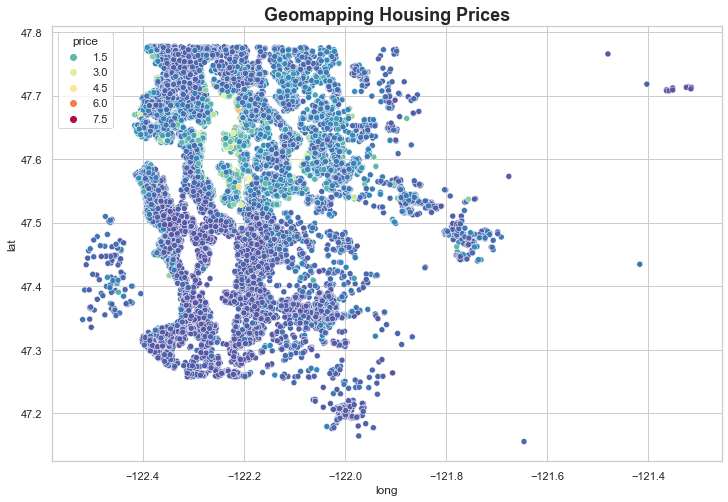

In [561]:
plt.figure(figsize=(12,8))
sns.scatterplot(df['long'], df['lat'], hue=df['price'], palette='Spectral_r')
plt.title("Geomapping Housing Prices", fontweight='bold', fontsize=18)

plt.show()


In [562]:
df['lat'].min()+ ((df['lat'].max() - df['lat'].min())/2)
df['North'] = np.where(df['lat']>47.5, 1, 0)
df['South'] = np.where(df['lat']<47.5, 1, 0)

In [563]:
df['North_South']= np.where(df['lat']>47.5, 'North', 'South')

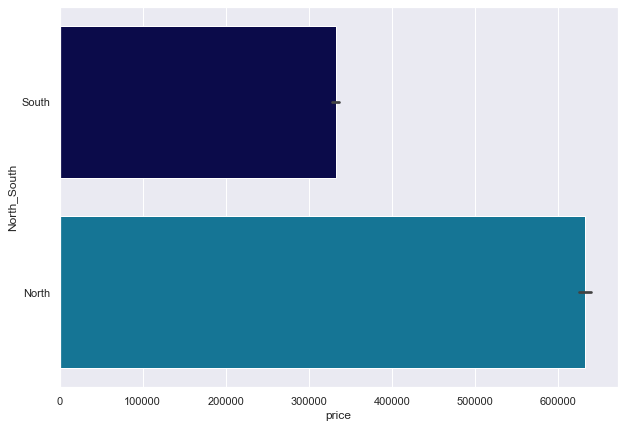

In [564]:
sns.set(rc={'figure.figsize':(10,7)})
sns.barplot(x = 'price', y = 'North_South', data = df, palette= 'ocean')
ax.set_title('Does Latitude affect Housing Price?')


plt.show()

In [565]:
#engineering a feature of fancy area with a waterfront view
df['lat_water']=  df['waterfront'] == 1 & (df['long'] > -122.4) & (df['lat'] > 47.5) 

df['North_water_view']= df['lat_water'] * df['water_x_view']

______

### ENGINEER DUMMY COLUMNS

In [566]:
 #df_clean[(df_clean['waterfront'] == 1) & (df_clean['long'] > -122.4) & (df_clean['lat'] > 47.5)]

In [567]:
bath_dum= pd.get_dummies(df, columns=['bathrooms_r'], drop_first=True)
NorthSouth_dum= pd.get_dummies(df, columns=['North_South'])
conditions2_dum= pd.get_dummies(df, columns= ['conditions_2'], drop_first=True)
view_dum= pd.get_dummies(df, columns= ['view'], drop_first=True)
grade_cat_dum= pd.get_dummies(df, columns=['grade_cat'], drop_first=True)
zipcode_dum= pd.get_dummies(df, columns=['zipcode'])


In [568]:
df_alldum= pd.get_dummies(df, columns= ['bathrooms_r','grade_cat', 'conditions_2', 'zipcode'])

In [569]:
df9

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,bed_x_bath,sqft_lot_cap,yard,sqft_living^2,sqft_condition,cond_x_grad,basement,yrs_post_reno,North,South,North_water_view,bathrooms_r_0-2,bathrooms_r_3-4,bathrooms_r_5-6,bathrooms_r_7-8,North_South_North,North_South_South,grade_1,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,conditions_2_Average,conditions_2_High,conditions_2_Poor,zipcode_98001,...,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,365000.0,4,2.25,2070,8893,2.0,0,0,4,2070,0,1986,0,47.4388,-122.162,2390,7700,9.0,8893,7858.000000,4284900,8280,32,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,865000.0,5,3.00,2900,6730,1.0,0,0,5,1830,1070,1977,0,47.6784,-122.285,2370,6283,15.0,6730,3830.000000,8410000,14500,40,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1038000.0,4,2.50,3770,10893,2.0,0,2,3,3770,0,1997,0,47.5646,-122.129,3710,9685,10.0,10893,9008.000000,14212900,11310,33,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1490000.0,3,3.50,4560,14608,2.0,0,2,3,4560,0,1990,0,47.6995,-122.228,4050,14226,10.5,14608,12328.000000,20793600,13680,36,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,711000.0,3,2.50,2550,5376,2.0,0,0,3,2550,0,2004,0,47.6647,-122.083,2250,4050,7.5,5376,4101.000000,6502500,7650,27,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,750000.0,5,2.50,3240,9960,1.0,0,1,3,2020,1220,1958,0,47.5858,-122.112,2730,10400,12.5,9960,6720.000000,10497600,9720,24,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17286,440000.0,2,1.75,1300,4000,2.0,0,0,3,1300,0,1948,0,47.6687,-122.288,1350,4013,3.5,4000,3350.000000,1690000,3900,21,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17287,310000.0,3,1.00,1050,9876,1.0,0,0,3,1050,0,1953,0,47.7635,-122.262,1760,9403,3.0,9876,8826.000000,1102500,3150,21,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17288,427500.0,3,1.50,1900,43186,1.5,0,0,4,1300,600,1971,0,47.4199,-121.990,2080,108028,4.5,43186,41919.3

In [612]:
df9 = df_alldum.drop(columns=['id','grade','North_South','lat_water','date', 'log_price', 'year', 'month',  'water_x_view', 'North_water_view', 'bathrooms_r_7-8', 'sqft_lot^2'])


In [613]:
df9.columns.tolist()

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'bed_x_bath',
 'sqft_lot_cap',
 'yard',
 'sqft_living^2',
 'sqft_condition',
 'cond_x_grad',
 'basement',
 'yrs_post_reno',
 'North',
 'South',
 'bathrooms_r_0-2',
 'bathrooms_r_3-4',
 'bathrooms_r_5-6',
 'grade_cat_Average',
 'grade_cat_Good',
 'grade_cat_High',
 'grade_cat_Poor',
 'conditions_2_Average',
 'conditions_2_High',
 'conditions_2_Poor',
 'zipcode_98001',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zip

_______

## Step 3: Run Models

DROP LOG_PRICE

In [614]:
features= df9.columns.tolist()
target= df9['price']

In [615]:
df9.dropna(inplace=True)
X,y= df9.drop(columns='price'), df9['price']

In [616]:
model_1= sm.OLS(y,X).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     876.1
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        14:49:25   Log-Likelihood:            -2.3059e+05
No. Observations:               17290   AIC:                         4.614e+05
Df Residuals:                   17187   BIC:                         4.622e+05
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms              2.097e+04   3891.012      5.389      0.000    1.33e+04    2.86e+04
bathrooms             6.574e+04   6266.296     10.491      0.000    5.35e+04     7.8e+04
sqft_living              4.1974      8.181      0.513      0.608     -11.839      20.234
sqft_lot               -30.5737      6.685     -4.574      0.000     -43.676     -17.471
floors               -5.359e+04   6622.309     -8.092      0.000   -6.66e+04   -4.06e+04
waterfront            6.413e+05   1.45e+04     44.327      0.000    6.13e+05     6.7e+05
view                  4.919e+04   1827.343     26.921      0.000    4.56e+04    5.28e+04
condition            -2.304e+05   8067.359    -28.554      0.000   -2.46e+05   -2.15e+05
sqft_above              30.4320      3.880      7.842      0.000      22.826      38.038
sqft_basement          -25.5590      6.304     -4.055      0.000     -37.915     -13.203
yr_built              -145.5580     71.698     -2.030      0.042    -286.094      -5.022
yr_renovated            66.8590      5.329     12.546      0.000      56.413      77.305
lat                   1.886e+05   6.87e+04      2.747      0.006     5.4e+04    3.23e+05
long                 -1.817e+05   4.73e+04     -3.841      0.000   -2.74e+05    -8.9e+04
sqft_living15           31.1675      3.087     10.095      0.000      25.116      37.219
sqft_lot15              -0.1352      0.070     -1.936      0.053      -0.272       0.002
bed_x_bath           -1.336e+04   1590.381     -8.400      0.000   -1.65e+04   -1.02e+04
sqft_lot_cap             0.1354      0.097      1.399      0.162      -0.054       0.325
yard                    30.7122      6.683      4.595      0.000      17.612      43.812
sqft_living^2            0.0246      0.001     25.389      0.000       0.023       0.027
sqft_condition           4.6217      2.369      1.951      0.051      -0.022       9.265
cond_x_grad           3.365e+04   1091.546     30.827      0.000    3.15e+04    3.58e+04
basement              6021.0489   4709.167      1.279      0.201   -3209.399    1.53e+04
yrs_post_reno        -2974.6787    357.830     -8.313      0.000   -3676.062   -2273.296
North                 7.126e+04   1.07e+05      0.668      0.504   -1.38e+05     2.8e+05
South                 3.974e+04   1.07e+05      0.373      0.710   -1.69e+05    2.49e+05
bathrooms_r_0-2      -4.714e+05   1.17e+05     -4.017      0.000   -7.01e+05   -2.41e+05
bathrooms_r_3-4      -4.515e+05   1.16e+05     -3.883      0.000   -6.79e+05   -2.24e+05
bathrooms_r_5-6      -1.978e+05   1.11e+05     -1.781      0.075   -4.16e+05    1.99e+04
grade_cat_Average    -1.265e+07   2.72e+06     -4.647      0.000    -1.8e+07   -7.32e+06
grade_cat_Good       -1.273e+07   2.72e+06     -4.677      0.000   -1.81e+07    -7.4e+06
grade_cat_High       -1.277e+07   2.72e+06     -4.692    

_______

### Test train Model :

______

In [617]:
X= df9.drop(columns='price')

In [618]:
from sklearn.linear_model import LinearRegression

#instantiatte linear regression object
lm= LinearRegression()
lm.fit(X, target)

#access output
print(lm.intercept_)
print(lm.coef_)

-30295699.670169465
[ 2.09677767e+04  6.57371949e+04  4.34005692e+00 -3.05736756e+01
 -5.35887616e+04  6.41267653e+05  4.91934795e+04 -2.30356358e+05
  3.02892985e+01 -2.57016663e+01 -1.45558029e+02  6.68590239e+01
  1.88638094e+05 -1.81678464e+05  3.11675372e+01 -1.35199669e-01
 -1.33587787e+04  1.35406118e-01  3.07122136e+01  2.46087779e-02
  4.62174084e+00  3.36493478e+04  6.02104815e+03 -2.97467874e+03
  7.12578967e+04  3.97449914e+04 -4.71386590e+05 -4.51493712e+05
 -1.97816424e+05  2.12355989e+04 -5.98622518e+04 -9.92562991e+04
  1.37882952e+05  4.44714693e+03  3.01567364e+04 -3.46038834e+04
 -1.37770514e+05 -1.11180902e+05 -1.59966169e+05  5.52954302e+05
  8.38083102e+04  4.88469241e+04  4.53213399e+04  5.58470759e+04
 -2.69837795e+04 -1.04482930e+05 -6.29682989e+04 -1.02890589e+05
 -6.96066200e+04 -1.89335819e+05 -1.11152447e+04  2.72818335e+03
 -1.14241049e+05  4.81779605e+04 -1.30380634e+05 -1.24988220e+05
 -1.41623193e+05  1.31026039e+05 -3.40760230e+04 -7.39043240e+04
  9.7

______

In [619]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,bed_x_bath,sqft_lot_cap,yard,sqft_living^2,sqft_condition,cond_x_grad,basement,yrs_post_reno,North,South,bathrooms_r_0-2,bathrooms_r_3-4,bathrooms_r_5-6,grade_cat_Average,grade_cat_Good,grade_cat_High,grade_cat_Poor,conditions_2_Average,conditions_2_High,conditions_2_Poor,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,...,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,4,2.25,2070,8893,2.0,0,0,4,2070,0,1986,0,47.4388,-122.162,2390,7700,9.0,8893,7858.000000,4284900,8280,32,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,3.00,2900,6730,1.0,0,0,5,1830,1070,1977,0,47.6784,-122.285,2370,6283,15.0,6730,3830.000000,8410000,14500,40,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,2.50,3770,10893,2.0,0,2,3,3770,0,1997,0,47.5646,-122.129,3710,9685,10.0,10893,9008.000000,14212900,11310,33,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,3.50,4560,14608,2.0,0,2,3,4560,0,1990,0,47.6995,-122.228,4050,14226,10.5,14608,12328.000000,20793600,13680,36,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,2.50,2550,5376,2.0,0,0,3,2550,0,2004,0,47.6647,-122.083,2250,4050,7.5,5376,4101.000000,6502500,7650,27,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,5,2.50,3240,9960,1.0,0,1,3,2020,1220,1958,0,47.5858,-122.112,2730,10400,12.5,9960,6720.000000,10497600,9720,24,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17286,2,1.75,1300,4000,2.0,0,0,3,1300,0,1948,0,47.6687,-122.288,1350,4013,3.5,4000,3350.000000,1690000,3900,21,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17287,3,1.00,1050,9876,1.0,0,0,3,1050,0,1953,0,47.7635,-122.262,1760,9403,3.0,9876,8826.000000,1102500,3150,21,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17288,3,1.50,1900,43186,1.5,0,0,4,1300,600,1971,0,47.4199,-121.990,2080,108028,4.5,43186,4191

In [620]:
#import train test split from sklearn package
from sklearn.model_selection import train_test_split

In [621]:
#call train test split on data & capture the result
X_train, X_test, y_train, y_test= train_test_split(X, target, random_state=7, test_size= 0.2)

In [622]:
#checking shape of the results
print('Training set- Features: ', X_train.shape, 'Target:', y_train.shape)
print('Training set- Features: ', X_test.shape, 'Target:', y_test.shape)



Training set- Features:  (13832, 106) Target: (13832,)
Training set- Features:  (3458, 106) Target: (3458,)


In [623]:
#fit a model
from sklearn import linear_model

In [624]:
#instantiating a linear regression object
lm= linear_model.LinearRegression()

#fitting the linear regression to training data
lm.fit(X_train, y_train)

print(lm.intercept_)
print(lm.coef_)

-30617977.834258087
[ 2.99104351e+04  7.53783751e+04 -2.03689084e+01 -3.54893569e+01
 -5.72788575e+04  6.62425818e+05  4.50243895e+04 -2.28807394e+05
  1.68631704e+01 -3.73283048e+01 -7.82880706e+01  7.19802976e+01
  1.51027059e+05 -1.89294495e+05  3.43192976e+01 -2.29367627e-01
 -1.70850403e+04  2.94589033e-01  3.56252443e+01  2.77087659e-02
  1.21367854e+01  3.13507135e+04  6.12624871e+03 -3.25070840e+03
  1.89735082e+04 -1.31783731e+04  6.68142054e+05  6.87884146e+05
  9.64024710e+05  1.79056336e+04 -5.49832462e+04 -8.83675958e+04
  1.25445208e+05  1.00989113e+04  4.28277789e+04 -5.29266902e+04
 -1.50018058e+05 -1.21970913e+05 -1.69395233e+05  5.48372745e+05
  8.56997896e+04  5.10982533e+04  5.22822927e+04  5.80150960e+04
 -3.86038128e+04 -9.66510647e+04 -5.85816957e+04 -9.26669065e+04
 -7.88637223e+04 -1.94926849e+05 -1.07583683e+04  8.84911902e+03
 -1.07729721e+05  5.01213240e+04 -1.37015517e+05 -1.30290194e+05
 -1.44046604e+05  1.39990352e+05 -2.72735239e+04 -8.33871439e+04
  9.5

**How well the model performed**

In [625]:
print('R^2 score:', lm.score(X_train, y_train))

R^2 score: 0.8391004000762956


In [626]:
#predicting on the training data
y_train_pred= lm.predict(X_train)

In [627]:
y_train_pred

array([423111.67209345, 404752.30038401, 417217.66787752, ...,
       968795.85936311, 269319.22301031, 638181.88365374])

In [628]:
#importing metrics from sklearn
from sklearn import metrics

train_mae= metrics.mean_absolute_error(y_train, y_train_pred)
train_mse= metrics.mean_squared_error(y_train, y_train_pred)
train_rmse= np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error:', train_mae)
print('Mean Squared Error:', train_mse)
print('Root Mean Squared Error:', train_rmse)



Mean Absolute Error: 86914.05246119744
Mean Squared Error: 21990444398.43226
Root Mean Squared Error: 148291.75431706329


In [629]:
price_std = target.std()

print('Z-Score of Mean Absolute Error:', train_mae/price_std )
print('Z-Score of Root Mean Absolute Error:', train_rmse/price_std )


Z-Score of Mean Absolute Error: 0.23281444932797854
Z-Score of Root Mean Absolute Error: 0.3972253294324336


**Predicting on Test Set**

In [630]:
#predicting on test set of data
y_pred= lm.predict(X_test)

In [631]:
y_pred[:10]

array([341284.37491409, 189964.6710262 , 858659.56413288, 587287.90699404,
       388336.60386424, 125437.74863447, 566006.75560901, 215759.49824095,
       242863.46132397, 971678.97615357])

In [632]:
print("Score:", lm.score(X_test, y_test))

Score: 0.8293082553663831


In [633]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))



Mean Absolute Error:89805.97516718884
Mean Squared Error:25619522571.05801
Root Mean Squared Error:160060.99640780076


In [634]:
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.2405609687138402
Root Mean Squared Error Z: 0.4287512971991075


### Comparing Model performace on training data versus test data



In [635]:
print('Training:', int(train_rmse), "vs. Testing:", int(test_rmse))

Training: 148291 vs. Testing: 160060


In [636]:
np.sqrt(len(X_train))

117.60952342391326

_______

**Checking to see if errors are normally distributed**

In [637]:
#creating a data array of our errors (residuals)
residuals= (y_test- y_pred)

/Users/leratsayukova/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='price'>

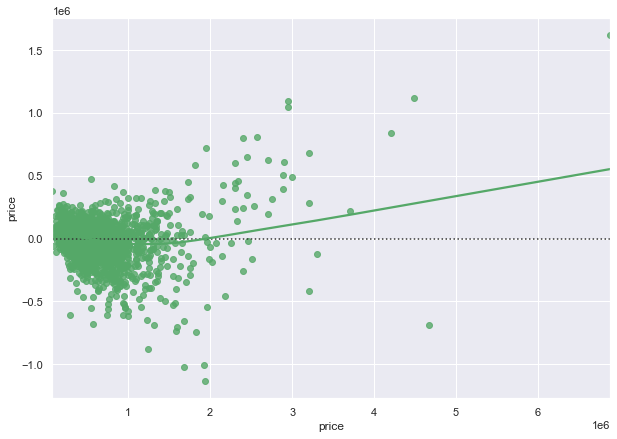

In [638]:
sns.residplot(y_test, residuals, lowess=True, color="g")

(array([1.800e+01, 4.740e+02, 2.876e+03, 6.300e+01, 1.600e+01, 6.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([-850177.90765878, -475934.56543685, -101691.22321492,
         272552.11900702,  646795.46122895, 1021038.80345088,
        1395282.14567281, 1769525.48789474, 2143768.83011667,
        2518012.1723386 , 2892255.51456054]),
 <BarContainer object of 10 artists>)

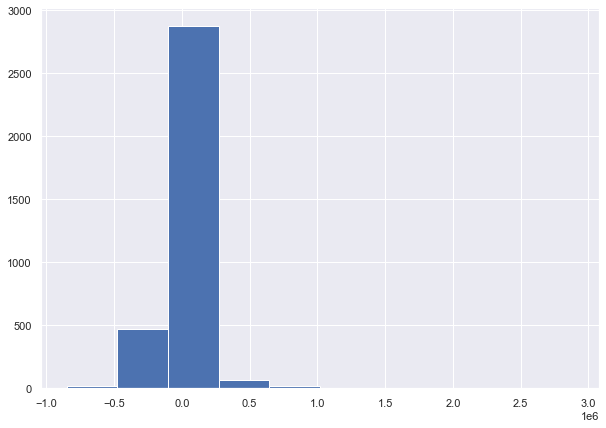

In [639]:
plt.hist(residuals)

In [640]:
#instantiate a linear regression object
lm_final = LinearRegression()

#fit the linear regression to the data
lm_final = lm_final.fit(X, target)

In [641]:
lm_final.coef_

array([ 2.09677767e+04,  6.57371949e+04,  4.34005692e+00, -3.05736756e+01,
       -5.35887616e+04,  6.41267653e+05,  4.91934795e+04, -2.30356358e+05,
        3.02892985e+01, -2.57016663e+01, -1.45558029e+02,  6.68590239e+01,
        1.88638094e+05, -1.81678464e+05,  3.11675372e+01, -1.35199669e-01,
       -1.33587787e+04,  1.35406118e-01,  3.07122136e+01,  2.46087779e-02,
        4.62174084e+00,  3.36493478e+04,  6.02104815e+03, -2.97467874e+03,
        7.12578967e+04,  3.97449914e+04, -4.71386590e+05, -4.51493712e+05,
       -1.97816424e+05,  2.12355989e+04, -5.98622518e+04, -9.92562991e+04,
        1.37882952e+05,  4.44714693e+03,  3.01567364e+04, -3.46038834e+04,
       -1.37770514e+05, -1.11180902e+05, -1.59966169e+05,  5.52954302e+05,
        8.38083102e+04,  4.88469241e+04,  4.53213399e+04,  5.58470759e+04,
       -2.69837795e+04, -1.04482930e+05, -6.29682989e+04, -1.02890589e+05,
       -6.96066200e+04, -1.89335819e+05, -1.11152447e+04,  2.72818335e+03,
       -1.14241049e+05,  

In [642]:
import pickle


pickle_out = open("model.pickle","wb")
pickle.dump(lm_final, pickle_out)
pickle_out.close()

In [643]:
len(lm.coef_)

106

In [644]:
len(X.columns)

106

In [645]:
X.columns.tolist()

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'bed_x_bath',
 'sqft_lot_cap',
 'yard',
 'sqft_living^2',
 'sqft_condition',
 'cond_x_grad',
 'basement',
 'yrs_post_reno',
 'North',
 'South',
 'bathrooms_r_0-2',
 'bathrooms_r_3-4',
 'bathrooms_r_5-6',
 'grade_cat_Average',
 'grade_cat_Good',
 'grade_cat_High',
 'grade_cat_Poor',
 'conditions_2_Average',
 'conditions_2_High',
 'conditions_2_Poor',
 'zipcode_98001',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038

In [646]:
len(X.columns)

106